In [ ]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-4s7d4tcn
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-4s7d4tcn
  Resolved https://github.com/huggingface/transformers.git to commit 093848d3ccf3884caf048718b6bae833da0edb94
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.0 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.35.0.dev0-py3-none-any.whl size=7817578 sha256=2132de5c82ecb3f92ae8682ef9ca130dd20aa99ed56f22138d0fbbc9122e2d09
  Stored in directory: /tmp/pip-ephem-whee

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

# **Download Image from the given URL**

In [ ]:
import requests
from PIL import Image
from io import BytesIO
image_url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwr1KWtIf85xACShG9E2ZORgqJi63Y8fjd40i9-KOwZA&s'
# image_url = 'https://images.unsplash.com/photo-1494976388531-d1058494cdd8?auto=format&fit=crop&q=80&w=1000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FyfGVufDB8fDB8fHww'

response = requests.get(image_url)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image.show()
else:
    print("Failed to retrieve the image.")


## **Display The downloaded image**


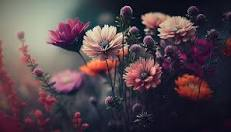

In [ ]:
#from IPython.display import Image
display(image)


## **Download Pre-trained Model**

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## **Extract Features**

In [ ]:
inputs = feature_extractor(images=image, return_tensors="pt")


## **Model Inference**

In [ ]:
outputs = model(**inputs)


In [ ]:
logits = outputs.logits


In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: daisy


In [ ]:
from transformers import GPT2Tokenizer, GPT2Model

model_name = "gpt2"  # You can choose a different model if needed
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)


In [ ]:
import torch

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

model_name = "gpt2"  # You can choose a different model if needed
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

word = "car"  # Replace with the word you want to describe
input_text = f"Describe {word}."
input_ids = tokenizer.encode(input_text, return_tensors="pt")

with torch.no_grad():
    output = model.generate(input_ids, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, top_p=0.92)

description = tokenizer.decode(output[0], skip_special_tokens=True).replace("Describe", "").strip()
print(f"Description of '{word}': {description}")


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.92` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Description of 'car': car.

"I'm a car guy. I'm not a guy who's going to drive a truck. But I do drive. And I drive because I want to be a good driver. So I don't want people to
